В этом упражнении мы не будем приводить примеры базового синтаксиса, а сразу перейдем к содержательной части, ознакомиться с основами идеологии языка и синтаксиса можно например [здесь](https://www.pythoncheatsheet.org)

**1. Сбор исторических биржевых данных и предсказание будущих**

In [ ]:
# установка библиотеки для доступа к финансовым данным от Yahoo и для анализа временных рядов
!pip install yfinance autots

In [ ]:
import yfinance as yf # импортирование библиотеки

In [ ]:
data = yf.download("AAPL TSLA", start="2021-01-01", end="2021-11-01")

[*********************100%***********************]  2 of 2 completed


In [ ]:
data.head()

Adj Close                   Close  ...        Open     Volume          
                  AAPL        TSLA        AAPL  ...        TSLA       AAPL      TSLA
Date                                            ...                                 
2021-01-04  128.617111  729.770020  129.410004  ...  719.460022  143301900  48638200
2021-01-05  130.207291  735.109985  131.009995  ...  723.659973   97664900  32245200
2021-01-06  125.824326  755.979980  126.599998  ...  758.489990  155088000  44700000
2021-01-07  130.117859  816.039978  130.919998  ...  777.630005  109578200  51498900
2021-01-08  131.240921  880.020020  132.050003  ...  856.000000  105158200  75055500

[5 rows x 12 columns]

Среди скаченных колонок Close/Open означают цены в моменты открытия/закрытия торгов, High/Low - минимальные цены в течение дня, Volume - объем продаж(суммарная стоимость всех сделок)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from autots import AutoTS  # библиотека для автоматического предсказания временных рядов(в том числе и цен)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
data['date'] = pd.to_datetime(data.index)
data["OpenTSLA"] = data["Open"]["TSLA"].astype(float)
data["OpenAAPL"] = data["Open"]["AAPL"].astype(float)
data_ = data[["date", "OpenTSLA", "OpenAAPL"]]  # оставляем только нужные колонки
data_.columns = ["date", "OpenTSLA", "OpenAAPL"]

In [ ]:
model = AutoTS(forecast_length=10, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=100)
model = model.fit(data_, date_col="date", value_col='OpenTSLA', id_col=None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
3/3 [==============================] - 7s 9ms/step - loss: 0.3743
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3620
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3496
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3407
Epoch 5/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3438
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3347
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3208
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3177
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.3219
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 0.3185
Epoch 11/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3170
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3086
E

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 41 with model LastValueNaive in generation 0 of 10
Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.619e-03, tolerance: 6.953e-04



Model Number: 54 with model UnivariateRegression in generation 0 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 54: UnivariateRegression
Model Number: 55 with model UnivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 55: UnivariateMotif
Model Number: 56 with model MultivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 56: MultivariateMotif
Model Number: 57 with model SectionalMotif in generation 0 of 10
Model Number: 58 with model NVAR in generation 0 of 10
Model Number: 59 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 59: Theta
Model Number: 60 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import n

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 97 with model ETS in generation 0 of 10
Model Number: 98 with model Theta in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'STL' from 'statsmodels.tsa.seasonal' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/seasonal.py)") in model 98: Theta
Model Number: 99 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 99: Theta
Model Number: 100 with model UnivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 100: UnivariateMotif
Model Number: 101 with model DatepartRegression in generation 0 of 10
Model Number: 102 with model AverageValueNaive in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 103 with model MultivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 103: MultivariateMotif
Model Number: 104 with model GLM in generation 0 of 10
Model Number: 105 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 105: UnobservedComponents
Model Number: 106 with model UnivariateMotif in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 106: UnivariateMotif
Model Number: 107 with model FBProphet in generation 0 of 10
Model Number: 108 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 108: VAR
Model Number: 109 with model ETS in generation 0 of 10
Model Number: 110 with model ETS in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+04, tolerance: 2.686e+01



Model Number: 111 with model AverageValueNaive in generation 0 of 10
Model Number: 112 with model NVAR in generation 0 of 10
Model Number: 113 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 113: Theta
Model Number: 114 with model AverageValueNaive in generation 0 of 10
Model Number: 115 with model WindowRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 116 with model MultivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 116: MultivariateMotif
Model Number: 117 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 117: VECM
Model Number: 118 with model SeasonalNaive in generation 0 of 10
Model Number: 119 with model VECM in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'STL' from 'statsmodels.tsa.seasonal' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/seasonal.py)") in model 119: VECM
Model Number: 120 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (66)') in model 120: SectionalMotif
Model Number: 121 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 121: Univari

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 135 with model UnivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 135: UnivariateMotif
Model Number: 136 with model MultivariateMotif in generation 0 of 10
Template Eval Error: AttributeError("module 'numpy.lib.stride_tricks' has no attribute 'sliding_window_view'") in model 136: MultivariateMotif
Model Number: 137 with model UnivariateRegression in generation 0 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 137: UnivariateRegression
Model Number: 138 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 138: VECM
Model Number: 139 with model SeasonalNaive in generation 0 of 10
Model Number: 140 with model SectionalMotif in generation 0 of 10
Model Number: 141 with model GLM in generation 0 of 10
Template Eval Error: ValueError

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



New Generation: 1 of 10
Model Number: 145 with model LastValueNaive in generation 1 of 10
Model Number: 146 with model LastValueNaive in generation 1 of 10
Model Number: 147 with model LastValueNaive in generation 1 of 10
Model Number: 148 with model SeasonalNaive in generation 1 of 10
Model Number: 149 with model SeasonalNaive in generation 1 of 10
Model Number: 150 with model SeasonalNaive in generation 1 of 10
Model Number: 151 with model SeasonalNaive in generation 1 of 10
Model Number: 152 with model NVAR in generation 1 of 10
Model Number: 153 with model NVAR in generation 1 of 10
Model Number: 154 with model NVAR in generation 1 of 10
Model Number: 155 with model NVAR in generation 1 of 10
Model Number: 156 with model ETS in generation 1 of 10
Model Number: 157 with model ETS in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+04, tolerance: 2.700e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+04, tolerance: 2.686e+01



Model Number: 158 with model ETS in generation 1 of 10
Template Eval Error: ImportError("cannot import name 'STL' from 'statsmodels.tsa.seasonal' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/seasonal.py)") in model 158: ETS
Model Number: 159 with model ETS in generation 1 of 10
Model Number: 160 with model SectionalMotif in generation 1 of 10
Model Number: 161 with model SectionalMotif in generation 1 of 10
Model Number: 162 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (36)') in model 162: SectionalMotif
Model Number: 163 with model SectionalMotif in generation 1 of 10
Model Number: 164 with model AverageValueNaive in generation 1 of 10
Model Number: 165 with model AverageValueNaive in generation 1 of 10
Template Eval Error: ImportError("cannot import name 'STL' from 'statsmodels.tsa.seasonal' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/seasonal.py)") in model 165: AverageValueNaive
Model Number: 166 wit

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 174 with model WindowRegression in generation 1 of 10
Model Number: 175 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 176 with model GLM in generation 1 of 10
Model Number: 177 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 177: GLM
Model Number: 178 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 178: GLM
Model Number: 179 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 179: GLM
Model Number: 180 with model ZeroesNaive in generation 1 of 10
Model Number: 181 with model ZeroesNaive in generation 1 of 10
Model Number: 182 with model ZeroesNaive in generation 1 of 10
Model Number: 183 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 184 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 185 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 186 with model FBProphet in generation 1 of 10
Model Number: 187 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 187: GluonTS
Model Number: 188 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 188: GluonTS
Model Number: 189 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 189: GluonTS
Model Number: 190 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 190: GluonTS
Model Number: 191 with model UnobservedComponents in generation 1 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 224 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 224: DatepartRegression
Model Number: 225 with model LastValueNaive in generation 2 of 10
Model Number: 226 with model SeasonalNaive in generation 2 of 10
Model Number: 227 with model SeasonalNaive in generation 2 of 10
Model Number: 228 with model SeasonalNaive in generation 2 of 10
Model Number: 229 with model SeasonalNaive in generation 2 of 10
Model Number: 230 with model GLM in generation 2 of 10
Model Number: 231 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 231: GLM
Model Number: 232 with model GLM in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 233 with model GLM in generation 2 of 10
Model Number: 234 with model GLS in generation 2 of 10
Model Number: 235 with model GLS in generation 2 of 10
Model Number: 236 with model GLS in generation 2 of 10
Model Number: 237 with model ETS in generation 2 of 10
Model Number: 238 with model ETS in generation 2 of 10
Model Number: 239 with model ETS in generation 2 of 10
Model Number: 240 with model ETS in generation 2 of 10
Model Number: 241 with model NVAR in generation 2 of 10
Model Number: 242 with model NVAR in generation 2 of 10
Model Number: 243 with model NVAR in generation 2 of 10
Model Number: 244 with model NVAR in generation 2 of 10
Model Number: 245 with model SectionalMotif in generation 2 of 10
Model Number: 246 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (8)') in model 246: SectionalMotif
Model Number: 247 with model SectionalMotif in generation 2 of 10
Model Number: 248 with model SectionalMotif in 

/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py:1232: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 253 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 253: WindowRegression
Model Number: 254 with model WindowRegression in generation 2 of 10
Model Number: 255 with model ZeroesNaive in generation 2 of 10
Model Number: 256 with model ZeroesNaive in generation 2 of 10
Model Number: 257 with model ZeroesNaive in generation 2 of 10
Model Number: 258 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 259 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 260 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 261 with model FBProphet in generation 2 of 10
Model Number: 262 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 262: GluonTS
Model Number: 263 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 263: GluonTS
Model Number: 264 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 264: GluonTS
Model Number: 265 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 265: GluonTS
Model Number: 266 with model UnobservedComponents in generation 2 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:511: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

invalid value encountered in reduce



Template Eval Error: ValueError('Only gave one variable to VECM') in model 276: VECM
Model Number: 277 with model UnivariateRegression in generation 2 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 277: UnivariateRegression
Model Number: 278 with model UnivariateRegression in generation 2 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 278: UnivariateRegression
Model Number: 279 with model UnivariateRegression in generation 2 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 279: UnivariateRegression
Model Number: 280 with model UnivariateRegression in generation 2 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 280: UnivariateRegression
Model Number: 281 with model UnivariateMotif in generation 2 of 10
Template Eval Error: AttributeError("module 'numpy.lib.strid

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 298 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 298: DatepartRegression
Model Number: 299 with model DatepartRegression in generation 3 of 10
Model Number: 300 with model LastValueNaive in generation 3 of 10
Model Number: 301 with model LastValueNaive in generation 3 of 10
Model Number: 302 with model LastValueNaive in generation 3 of 10
Model Number: 303 with model SeasonalNaive in generation 3 of 10
Model Number: 304 with model SeasonalNaive in generation 3 of 10
Model Number: 305 with model SeasonalNaive in generation 3 of 10
Model Number: 306 with model SeasonalNaive in generation 3 of 10
Model Number: 307 with model ETS in generation 3 of 10
Model Number: 308 with model ETS in generation 3 of 10
Model Number: 309 with model ETS in generation 3 of 10
Model Number: 310 with model ETS in generation 3 of 10
Model Number: 311 with model FBProphet in generation 3 of 10

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 312 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 313 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 314 with model FBProphet in generation 3 of 10
Model Number: 315 with model GLM in generation 3 of 10
Model Number: 316 with model GLM in generation 3 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 316: GLM
Model Number: 317 with model GLM in generation 3 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 317: GLM
Model Number: 318 with model GLM in generation 3 of 10
Model Number: 319 with model GLS in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 320 with model GLS in generation 3 of 10
Model Number: 321 with model GLS in generation 3 of 10
Model Number: 322 with model NVAR in generation 3 of 10
Model Number: 323 with model NVAR in generation 3 of 10
Model Number: 324 with model NVAR in generation 3 of 10
Model Number: 325 with model NVAR in generation 3 of 10
Model Number: 326 with model AverageValueNaive in generation 3 of 10
Model Number: 327 with model AverageValueNaive in generation 3 of 10
Model Number: 328 with model AverageValueNaive in generation 3 of 10
Model Number: 329 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 330 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 331 with model WindowRegression in generation 3 of 10
Model Number: 332 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 332: SectionalMotif
Model Number: 333 with model SectionalMotif in generation 3 of 10
Model Number: 334 with model SectionalMotif in generation 3 of 10
Model Number: 335 with model SectionalMotif in generation 3 of 10
Model Number: 336 with model ZeroesNaive in generation 3 of 10
Model Number: 337 with model ZeroesNaive in generation 3 of 10
Model Number: 338 with model ZeroesNaive in generation 3 of 10
Model Number: 339 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 339: GluonTS
Model Number: 340 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 380 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 380: UnobservedComponents
Model Number: 381 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 381: UnobservedComponents
Model Number: 382 with model UnobservedComponents in generation 4 of 10
Model Number: 383 with model SeasonalNaive in generation 4 of 10
Model Number: 384 with model SeasonalNaive in generation 4 of 10
Model Number: 385 with model SeasonalNaive in generation 4 of 10
Model Number: 386 with model SeasonalNaive in generation 4 of 10
Model Number: 387 with model ETS in generation 4 of 10
Model Number: 388 with model ETS in generation 4 of 10
Model Number: 389 with model ETS in generation 4 of 10
Model Number: 390 with model ETS in generation 4 of 10
Model Number: 391 with model FBProphet in generation

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 392 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 393 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 394 with model FBProphet in generation 4 of 10
Model Number: 395 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 395: GLM
Model Number: 396 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e-02, tolerance: 5.184e-04



Model Number: 397 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 397: GLM
Model Number: 398 with model GLM in generation 4 of 10
Model Number: 399 with model GLS in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 400 with model GLS in generation 4 of 10
Model Number: 401 with model NVAR in generation 4 of 10
Model Number: 402 with model NVAR in generation 4 of 10
Model Number: 403 with model NVAR in generation 4 of 10
Model Number: 404 with model NVAR in generation 4 of 10
Model Number: 405 with model AverageValueNaive in generation 4 of 10
Model Number: 406 with model AverageValueNaive in generation 4 of 10
Model Number: 407 with model AverageValueNaive in generation 4 of 10
Model Number: 408 with model SectionalMotif in generation 4 of 10
Model Number: 409 with model SectionalMotif in generation 4 of 10
Model Number: 410 with model SectionalMotif in generation 4 of 10
Model Number: 411 with model SectionalMotif in generation 4 of 10
Model Number: 412 with model WindowRegression in generation 4 of 10
Model Number: 413 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 413: WindowRegression
Model Number: 414 with model WindowRegression in generation 4 of 10
Model Number: 415 with model ZeroesNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 416 with model ZeroesNaive in generation 4 of 10
Model Number: 417 with model ZeroesNaive in generation 4 of 10
Model Number: 418 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 418: GluonTS
Model Number: 419 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 419: GluonTS
Model Number: 420 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 420: GluonTS
Model Number: 421 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 421: GluonTS
Model Number: 422 with model VAR in generation 4 of 10
Template Eval Error: ValueE

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 468 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 469 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 470 with model FBProphet in generation 5 of 10
Model Number: 471 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 471: GLM
Model Number: 472 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 472: GLM
Model Number: 473 with model GLM in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in multiply



Model Number: 474 with model GLM in generation 5 of 10
Model Number: 475 with model GLS in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 476 with model GLS in generation 5 of 10
Model Number: 477 with model GLS in generation 5 of 10
Model Number: 478 with model NVAR in generation 5 of 10
Model Number: 479 with model NVAR in generation 5 of 10
Model Number: 480 with model NVAR in generation 5 of 10
Model Number: 481 with model NVAR in generation 5 of 10
Model Number: 482 with model AverageValueNaive in generation 5 of 10
Model Number: 483 with model AverageValueNaive in generation 5 of 10
Model Number: 484 with model AverageValueNaive in generation 5 of 10
Model Number: 485 with model SectionalMotif in generation 5 of 10
Model Number: 486 with model SectionalMotif in generation 5 of 10
Model Number: 487 with model SectionalMotif in generation 5 of 10
Model Number: 488 with model SectionalMotif in generation 5 of 10
Model Number: 489 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 489: WindowRegression
Model N

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 544 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 545 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 546 with model FBProphet in generation 6 of 10
Model Number: 547 with model GLM in generation 6 of 10
Model Number: 548 with model GLM in generation 6 of 10
Model Number: 549 with model GLM in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 550 with model GLM in generation 6 of 10
Model Number: 551 with model GLS in generation 6 of 10
Model Number: 552 with model GLS in generation 6 of 10
Model Number: 553 with model GLS in generation 6 of 10
Model Number: 554 with model NVAR in generation 6 of 10
Model Number: 555 with model NVAR in generation 6 of 10
Model Number: 556 with model NVAR in generation 6 of 10
Model Number: 557 with model NVAR in generation 6 of 10
Model Number: 558 with model AverageValueNaive in generation 6 of 10
Model Number: 559 with model AverageValueNaive in generation 6 of 10
Model Number: 560 with model SectionalMotif in generation 6 of 10
Model Number: 561 with model SectionalMotif in generation 6 of 10
Model Number: 562 with model SectionalMotif in generation 6 of 10
Model Number: 563 with model SectionalMotif in generation 6 of 10
Model Number: 564 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 565 with model WindowRegression in generation 6 of 10
Model Number: 566 with model WindowRegression in generation 6 of 10
Model Number: 567 with model ZeroesNaive in generation 6 of 10
Model Number: 568 with model ZeroesNaive in generation 6 of 10
Model Number: 569 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 569: GluonTS
Model Number: 570 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 570: GluonTS
Model Number: 571 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 571: GluonTS
Model Number: 572 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version

Model Number: 605 with model DatepartRegression in generation 7 of 10
Epoch 1/50
3/3 [==============================] - 5s 324ms/step - loss: nan - val_loss: nan
Epoch 2/50
3/3 [==============================] - 0s 63ms/step - loss: nan - val_loss: nan
Epoch 3/50
3/3 [==============================] - 0s 50ms/step - loss: nan - val_loss: nan
Epoch 4/50
3/3 [==============================] - 0s 49ms/step - loss: nan - val_loss: nan
Epoch 5/50
3/3 [==============================] - 0s 51ms/step - loss: nan - val_loss: nan
Epoch 6/50
3/3 [==============================] - 0s 51ms/step - loss: nan - val_loss: nan
Epoch 7/50
3/3 [==============================] - 0s 55ms/step - loss: nan - val_loss: nan
Epoch 8/50
3/3 [==============================] - 0s 50ms/step - loss: nan - val_loss: nan
Epoch 9/50
3/3 [==============================] - 0s 52ms/step - loss: nan - val_loss: nan
Epoch 10/50
3/3 [==============================] - 0s 55ms/step - loss: nan - val_loss: nan


Model Number: 606 with model UnobservedComponents in generation 7 of 10
Model Number: 607 with model UnobservedComponents in generation 7 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 607: UnobservedComponents
Model Number: 608 with model UnobservedComponents in generation 7 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 608: UnobservedComponents
Model Number: 609 with model SeasonalNaive in generation 7 of 10
Model Number: 610 with model SeasonalNaive in generation 7 of 10
Model Number: 611 with model SeasonalNaive in generation 7 of 10
Model Number: 612 with model SeasonalNaive in generation 7 of 10
Model Number: 613 with model WindowRegression in generation 7 of 10
Model Number: 614 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 614: WindowRegression
Model Number: 615 with model WindowRegression in generation 7 of 10
Model Number: 616 with model ETS in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 617 with model ETS in generation 7 of 10
Model Number: 618 with model ETS in generation 7 of 10
Model Number: 619 with model ETS in generation 7 of 10
Model Number: 620 with model GLM in generation 7 of 10
Model Number: 621 with model GLM in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

INFO:fbprophet:Disabling yea

Model Number: 622 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 622: GLM
Model Number: 623 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 623: GLM
Model Number: 624 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 625 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 626 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 627 with model FBProphet in generation 7 of 10
Model Number: 628 with model GLS in generation 7 of 10
Model Number: 629 with model GLS in generation 7 of 10
Model Number: 630 with model GLS in generation 7 of 10
Model Number: 631 with model NVAR in generation 7 of 10
Model Number: 632 with model NVAR in generation 7 of 10
Model Number: 633 with model NVAR in generation 7 of 10
Model Number: 634 with model NVAR in generation 7 of 10
Model Number: 635 with model AverageValueNaive in generation 7 of 10
Model Number: 636 with model AverageValueNaive in generation 7 of 10
Model Number: 637 with model AverageValueNaive in generation 7 of 10
Model Number: 638 with model SectionalMotif in generation 7 of 10
Model Number: 639 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (5)') in model 639: SectionalMotif
Model Number: 640 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=100) out of bou

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

Model Number: 691 with model WindowRegression in generation 8 of 10
Model Number: 692 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 692: WindowRegression
Model Number: 693 with model AverageValueNaive in generation 8 of 10
Model Number: 694 with model AverageValueNaive in generation 8 of 10
Model Number: 695 with model AverageValueNaive in generation 8 of 10
Template Eval Error: ImportError("cannot import name 'STL' from 'statsmodels.tsa.seasonal' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/seasonal.py)") in model 695: AverageValueNaive
Model Number: 696 with model ETS in generation 8 of 10
Model Number: 697 with model ETS in generation 8 of 10
Model Number: 698 with model ETS in generation 8 of 10
Model Number: 699 with model GLM in generation 8 of 10
Model Number: 700 with model GLM in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



Model Number: 701 with model GLM in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 702 with model GLM in generation 8 of 10
Model Number: 703 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 704 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 705 with model FBProphet in generation 8 of 10
Model Number: 706 with model FBProphet in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 706: FBProphet
Model Number: 707 with model GLS in generation 8 of 10
Model Number: 708 with model GLS in generation 8 of 10
Model Number: 709 with model NVAR in generation 8 of 10
Model Number: 710 with model NVAR in generation 8 of 10
Model Number: 711 with model NVAR in generation 8 of 10
Model Number: 712 with model NVAR in generation 8 of 10
Model Number: 713 with model SectionalMotif in generation 8 of 10
Model Number: 714 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (8)') in model 714: SectionalMotif
Model Number: 715 with model SectionalMotif in generation 8 of 10
Model Number: 716 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (8)') in model 716: 

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:774: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e-02, tolerance: 1.344e-02

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_powe

Model Number: 766 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 766: GLM
Model Number: 767 with model GLM in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 768 with model WindowRegression in generation 9 of 10
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.4182 - val_loss: 0.9728
Epoch 2/50
1/1 [==============================] - 0s 156ms/step - loss: 0.3942 - val_loss: 0.9631
Epoch 3/50
1/1 [==============================] - 0s 165ms/step - loss: 0.3731 - val_loss: 0.9534
Epoch 4/50
1/1 [==============================] - 0s 153ms/step - loss: 0.4302 - val_loss: 0.9438
Epoch 5/50
1/1 [==============================] - 0s 179ms/step - loss: 0.5253 - val_loss: 0.9342
Epoch 6/50
1/1 [==============================] - 0s 162ms/step - loss: 0.3698 - val_loss: 0.9248
Epoch 7/50
1/1 [==============================] - 0s 159ms/step - loss: 0.4137 - val_loss: 0.9155
Epoch 8/50
1/1 [==============================] - 0s 155ms/step - loss: 0.4355 - val_loss: 0.9062
Epoch 9/50
1/1 [==============================] - 0s 153ms/step - loss: 0.4085 - val_loss: 0.8971
Epoch 10/50
1/1 [==============================] - 0s

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 775 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 776 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 777 with model FBProphet in generation 9 of 10
Model Number: 778 with model ETS in generation 9 of 10
Model Number: 779 with model ETS in generation 9 of 10
Model Number: 780 with model ETS in generation 9 of 10
Model Number: 781 with model ETS in generation 9 of 10
Model Number: 782 with model GLS in generation 9 of 10
Model Number: 783 with model GLS in generation 9 of 10
Model Number: 784 with model GLS in generation 9 of 10
Model Number: 785 with model NVAR in generation 9 of 10
Model Number: 786 with model NVAR in generation 9 of 10
Model Number: 787 with model NVAR in generation 9 of 10
Model Number: 788 with model NVAR in generation 9 of 10
Model Number: 789 with model SectionalMotif in generation 9 of 10
Model Number: 790 with model SectionalMotif in generation 9 of 10
Model Number: 791 with model SectionalMotif in generation 9 of 10
Model Number: 792 with model SectionalMotif in generation 9 of 10
Model Number: 793 with model ZeroesNaive in generation 9 of 10
Mod

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 830 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series') in model 830: DatepartRegression
Model Number: 831 with model SeasonalNaive in generation 10 of 10
Model Number: 832 with model SeasonalNaive in generation 10 of 10
Model Number: 833 with model SeasonalNaive in generation 10 of 10
Model Number: 834 with model SeasonalNaive in generation 10 of 10
Model Number: 835 with model UnobservedComponents in generation 10 of 10
Model Number: 836 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 836: UnobservedComponents
Model Number: 837 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 837: UnobservedComponents
Model Number: 838 with model GLM in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e+04, tolerance: 2.600e+01



Model Number: 839 with model GLM in generation 10 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 839: GLM
Model Number: 840 with model GLM in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



Model Number: 841 with model GLM in generation 10 of 10
Model Number: 842 with model WindowRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 842: WindowRegression
Model Number: 843 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 843: WindowRegression
Model Number: 844 with model WindowRegression in generation 10 of 10
Model Number: 845 with model AverageValueNaive in generation 10 of 10
Model Number: 846 with model AverageValueNaive in generation 10 of 10
Model Number: 847 with model AverageValueNaive in generation 10 of 10
Model Number: 848 with model ETS in generation 10 of 10
Model Number: 849 with model ETS in generation 10 of 10
Model Number: 850 with model ETS in generation 10 of 10
Model Number: 851 with model ETS in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 852 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 853 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 854 with model FBProphet in generation 10 of 10
Model Number: 855 with model GLS in generation 10 of 10
Model Number: 856 with model GLS in generation 10 of 10
Model Number: 857 with model NVAR in generation 10 of 10
Model Number: 858 with model NVAR in generation 10 of 10
Model Number: 859 with model NVAR in generation 10 of 10
Model Number: 860 with model NVAR in generation 10 of 10
Model Number: 861 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (2)') in model 861: SectionalMotif
Model Number: 862 with model SectionalMotif in generation 10 of 10
Model Number: 863 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (15)') in model 863: SectionalMotif
Model Number: 864 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required by check_pairwise_arrays.') in model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 871 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 872 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Validation Round: 1
Model Number: 1 of 106 with model LastValueNaive for Validation 1
1 - LastValueNaive with avg smape 2.14: 
Model Number: 2 of 106 with model LastValueNaive for Validation 1
2 - LastValueNaive with avg smape 9.34: 
Model Number: 3 of 106 with model Ensemble for Validation 1
3 - Ensemble with avg smape 2.34: 
Model Number: 4 of 106 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 2.17: 
Model Number: 5 of 106 with model LastValueNaive for Validation 1
5 - LastValueNaive with avg smape 4.06: 
Model Number: 6 of 106 with model DatepartRegression for Validation 1
6 - DatepartRegression with avg smape 4.99: 
Model Number: 7 of 106 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



7 - Ensemble with avg smape 1.64: 
Model Number: 8 of 106 with model SeasonalNaive for Validation 1
8 - SeasonalNaive with avg smape 1.44: 
Model Number: 9 of 106 with model LastValueNaive for Validation 1
9 - LastValueNaive with avg smape 15.3: 
Model Number: 10 of 106 with model LastValueNaive for Validation 1
10 - LastValueNaive with avg smape 10.06: 
Model Number: 11 of 106 with model Ensemble for Validation 1
11 - Ensemble with avg smape 8.44: 
Model Number: 12 of 106 with model DatepartRegression for Validation 1
12 - DatepartRegression with avg smape 3.51: 
Model Number: 13 of 106 with model UnobservedComponents for Validation 1
13 - UnobservedComponents with avg smape 4.56: 
Model Number: 14 of 106 with model LastValueNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



14 - LastValueNaive with avg smape 4.31: 
Model Number: 15 of 106 with model LastValueNaive for Validation 1
15 - LastValueNaive with avg smape 4.3: 
Model Number: 16 of 106 with model LastValueNaive for Validation 1
16 - LastValueNaive with avg smape 4.3: 
Model Number: 17 of 106 with model SeasonalNaive for Validation 1
17 - SeasonalNaive with avg smape 2.2: 
Model Number: 18 of 106 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



18 - GLM with avg smape 2.9: 
Model Number: 19 of 106 with model SeasonalNaive for Validation 1
19 - SeasonalNaive with avg smape 2.56: 
Model Number: 20 of 106 with model SeasonalNaive for Validation 1
20 - SeasonalNaive with avg smape 2.56: 
Model Number: 21 of 106 with model SeasonalNaive for Validation 1
21 - SeasonalNaive with avg smape 2.46: 
Model Number: 22 of 106 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 2.05: 
Model Number: 23 of 106 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



23 - GLM with avg smape 1.42: 
Model Number: 24 of 106 with model SeasonalNaive for Validation 1
24 - SeasonalNaive with avg smape 1.31: 
Model Number: 25 of 106 with model SeasonalNaive for Validation 1
25 - SeasonalNaive with avg smape 6.84: 
Model Number: 26 of 106 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



26 - WindowRegression with avg smape 0.99: 
Model Number: 27 of 106 with model DatepartRegression for Validation 1
27 - DatepartRegression with avg smape 3.12: 
Model Number: 28 of 106 with model SeasonalNaive for Validation 1
28 - SeasonalNaive with avg smape 1.16: 
Model Number: 29 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29 - FBProphet with avg smape 15.9: 
Model Number: 30 of 106 with model ETS for Validation 1
30 - ETS with avg smape 8.34: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31 - AverageValueNaive with avg smape 1.18: 
Model Number: 32 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32 - FBProphet with avg smape 1.62: 
Model Number: 33 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33 - FBProphet with avg smape 15.53: 
Model Number: 34 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34 - FBProphet with avg smape 14.83: 
Model Number: 35 of 106 with model FBProphet for Validation 1
35 - FBProphet with avg smape 1.62: 
Model Number: 36 of 106 with model ETS for Validation 1
36 - ETS with avg smape 0.99: 
Model Number: 37 of 106 with model GLM for Validation 1
37 - GLM with avg smape 1.4: 
Model Number: 38 of 106 with model GLM for Validation 1
38 - GLM with avg smape 1.4: 
Model Number: 39 of 106 with model GLS for Validation 1
39 - GLS with avg smape 1.4: 
Model Number: 40 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


40 - FBProphet with avg smape 16.13: 
Model Number: 41 of 106 with model ETS for Validation 1
41 - ETS with avg smape 1.65: 
Model Number: 42 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


42 - FBProphet with avg smape 16.19: 
Model Number: 43 of 106 with model ETS for Validation 1
43 - ETS with avg smape 1.88: 
Model Number: 44 of 106 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


44 - FBProphet with avg smape 5.38: 
Model Number: 45 of 106 with model GLM for Validation 1
45 - GLM with avg smape 1.74: 
Model Number: 46 of 106 with model GLS for Validation 1
46 - GLS with avg smape 1.55: 
Model Number: 47 of 106 with model ETS for Validation 1
47 - ETS with avg smape 1.31: 
Model Number: 48 of 106 with model GLM for Validation 1
48 - GLM with avg smape 1.51: 
Model Number: 49 of 106 with model GLM for Validation 1
49 - GLM with avg smape 1.51: 
Model Number: 50 of 106 with model ETS for Validation 1
50 - ETS with avg smape 1.43: 
Model Number: 51 of 106 with model ETS for Validation 1
51 - ETS with avg smape 1.43: 
Model Number: 52 of 106 with model NVAR for Validation 1
52 - NVAR with avg smape 7.36: 
Model Number: 53 of 106 with model ETS for Validation 1
53 - ETS with avg smape 1.33: 
Model Number: 54 of 106 with model GLS for Validation 1
54 - GLS with avg smape 1.33: 
Model Number: 55 of 106 with model NVAR for Validation 1
55 - NVAR with avg smape 1.65: 
Mo

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



77 - Ensemble with avg smape 2.3: 
Model Number: 78 of 106 with model SectionalMotif for Validation 1
78 - SectionalMotif with avg smape 0.97: 
Model Number: 79 of 106 with model SectionalMotif for Validation 1
79 - SectionalMotif with avg smape 1.16: 
Model Number: 80 of 106 with model SectionalMotif for Validation 1
80 - SectionalMotif with avg smape 0.89: 
Model Number: 81 of 106 with model SectionalMotif for Validation 1
81 - SectionalMotif with avg smape 1.4: 
Model Number: 82 of 106 with model WindowRegression for Validation 1
82 - WindowRegression with avg smape 3.23: 
Model Number: 83 of 106 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py:1232: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



83 - WindowRegression with avg smape 1.37: 
Model Number: 84 of 106 with model NVAR for Validation 1
84 - NVAR with avg smape 6.2: 
Model Number: 85 of 106 with model WindowRegression for Validation 1
85 - WindowRegression with avg smape 1.8: 
Model Number: 86 of 106 with model NVAR for Validation 1
86 - NVAR with avg smape 2.69: 
Model Number: 87 of 106 with model GLM for Validation 1
87 - GLM with avg smape 1.48: 
Model Number: 88 of 106 with model NVAR for Validation 1
88 - NVAR with avg smape 1.33: 
Model Number: 89 of 106 with model WindowRegression for Validation 1
89 - WindowRegression with avg smape 1.68: 
Model Number: 90 of 106 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

90 - WindowRegression with avg smape 0.92: 
Model Number: 91 of 106 with model UnobservedComponents for Validation 1
91 - UnobservedComponents with avg smape 1.3: 
Model Number: 92 of 106 with model DatepartRegression for Validation 1
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 160795672822415360.0000 - val_loss: 32009594540654592.0000
Epoch 2/50
1/1 [==============================] - 0s 292ms/step - loss: 94099812877598720.0000 - val_loss: 10354221257850880.0000
Epoch 3/50
1/1 [==============================] - 0s 293ms/step - loss: 102001092413358080.0000 - val_loss: 19236550780911616.0000
Epoch 4/50
1/1 [==============================] - 0s 297ms/step - loss: 87702837047328768.0000 - val_loss: 31432387443294208.0000
Epoch 5/50
1/1 [==============================] - 0s 301ms/step - loss: 84503206670893056.0000 - val_loss: 8170104223170560.0000
Epoch 6/50
1/1 [==============================] - 0s 295ms/step - loss: 98897677894287360.0000 - val_loss: 5222134771

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 5.96: 
Model Number: 5 of 106 with model LastValueNaive for Validation 2
5 - LastValueNaive with avg smape 6.71: 
Model Number: 6 of 106 with model DatepartRegression for Validation 2
6 - DatepartRegression with avg smape 5.94: 
Model Number: 7 of 106 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



7 - Ensemble with avg smape 2.37: 
Model Number: 8 of 106 with model SeasonalNaive for Validation 2
8 - SeasonalNaive with avg smape 3.9: 
Model Number: 9 of 106 with model LastValueNaive for Validation 2
9 - LastValueNaive with avg smape 3.47: 
Model Number: 10 of 106 with model LastValueNaive for Validation 2
10 - LastValueNaive with avg smape 3.27: 
Model Number: 11 of 106 with model Ensemble for Validation 2
11 - Ensemble with avg smape 2.63: 
Model Number: 12 of 106 with model DatepartRegression for Validation 2
12 - DatepartRegression with avg smape 3.61: 
Model Number: 13 of 106 with model UnobservedComponents for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



13 - UnobservedComponents with avg smape 2.55: 
Model Number: 14 of 106 with model LastValueNaive for Validation 2
14 - LastValueNaive with avg smape 1.96: 
Model Number: 15 of 106 with model LastValueNaive for Validation 2
15 - LastValueNaive with avg smape 2.56: 
Model Number: 16 of 106 with model LastValueNaive for Validation 2
16 - LastValueNaive with avg smape 2.56: 
Model Number: 17 of 106 with model SeasonalNaive for Validation 2
17 - SeasonalNaive with avg smape 3.56: 
Model Number: 18 of 106 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

invalid value encountered in log



18 - GLM with avg smape 2.91: 
Model Number: 19 of 106 with model SeasonalNaive for Validation 2
19 - SeasonalNaive with avg smape 3.76: 
Model Number: 20 of 106 with model SeasonalNaive for Validation 2
20 - SeasonalNaive with avg smape 3.76: 
Model Number: 21 of 106 with model SeasonalNaive for Validation 2
21 - SeasonalNaive with avg smape 2.86: 
Model Number: 22 of 106 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 3.23: 
Model Number: 23 of 106 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



23 - GLM with avg smape 2.91: 
Model Number: 24 of 106 with model SeasonalNaive for Validation 2
24 - SeasonalNaive with avg smape 4.17: 
Model Number: 25 of 106 with model SeasonalNaive for Validation 2
25 - SeasonalNaive with avg smape 20.73: 
Model Number: 26 of 106 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



26 - WindowRegression with avg smape 2.27: 
Model Number: 27 of 106 with model DatepartRegression for Validation 2
27 - DatepartRegression with avg smape 2.96: 
Model Number: 28 of 106 with model SeasonalNaive for Validation 2
28 - SeasonalNaive with avg smape 1.93: 
Model Number: 29 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29 - FBProphet with avg smape 15.1: 
Model Number: 30 of 106 with model ETS for Validation 2
30 - ETS with avg smape 7.5: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31 - AverageValueNaive with avg smape 1.73: 
Model Number: 32 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32 - FBProphet with avg smape 1.94: 
Model Number: 33 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33 - FBProphet with avg smape 14.86: 
Model Number: 34 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34 - FBProphet with avg smape 14.14: 
Model Number: 35 of 106 with model FBProphet for Validation 2
35 - FBProphet with avg smape 1.94: 
Model Number: 36 of 106 with model ETS for Validation 2
36 - ETS with avg smape 1.93: 
Model Number: 37 of 106 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning:

divide by zero encountered in true_divide



37 - GLM with avg smape 2.91: 
Model Number: 38 of 106 with model GLM for Validation 2
38 - GLM with avg smape 2.48: 
Model Number: 39 of 106 with model GLS for Validation 2
39 - GLS with avg smape 2.48: 
Model Number: 40 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


40 - FBProphet with avg smape 15.31: 
Model Number: 41 of 106 with model ETS for Validation 2
41 - ETS with avg smape 2.49: 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 42 of 106 with model FBProphet for Validation 2
42 - FBProphet with avg smape 15.41: 
Model Number: 43 of 106 with model ETS for Validation 2
43 - ETS with avg smape 2.13: 
Model Number: 44 of 106 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


44 - FBProphet with avg smape 2.42: 
Model Number: 45 of 106 with model GLM for Validation 2
45 - GLM with avg smape 1.84: 
Model Number: 46 of 106 with model GLS for Validation 2
46 - GLS with avg smape 2.22: 
Model Number: 47 of 106 with model ETS for Validation 2
47 - ETS with avg smape 2.42: 
Model Number: 48 of 106 with model GLM for Validation 2
48 - GLM with avg smape 2.44: 
Model Number: 49 of 106 with model GLM for Validation 2
49 - GLM with avg smape 2.44: 
Model Number: 50 of 106 with model ETS for Validation 2
50 - ETS with avg smape 2.34: 
Model Number: 51 of 106 with model ETS for Validation 2
51 - ETS with avg smape 2.34: 
Model Number: 52 of 106 with model NVAR for Validation 2
52 - NVAR with avg smape 2.47: 
Model Number: 53 of 106 with model ETS for Validation 2
53 - ETS with avg smape 1.83: 
Model Number: 54 of 106 with model GLS for Validation 2
54 - GLS with avg smape 1.83: 
Model Number: 55 of 106 with model NVAR for Validation 2
55 - NVAR with avg smape 3.88: 
Mo

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



78 - SectionalMotif with avg smape 1.99: 
Model Number: 79 of 106 with model SectionalMotif for Validation 2
79 - SectionalMotif with avg smape 1.72: 
Model Number: 80 of 106 with model SectionalMotif for Validation 2
80 - SectionalMotif with avg smape 1.97: 
Model Number: 81 of 106 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 1.83: 
Model Number: 82 of 106 with model WindowRegression for Validation 2
82 - WindowRegression with avg smape 1.6: 
Model Number: 83 of 106 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py:1232: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



83 - WindowRegression with avg smape 1.79: 
Model Number: 84 of 106 with model NVAR for Validation 2
84 - NVAR with avg smape 2.96: 
Model Number: 85 of 106 with model WindowRegression for Validation 2
85 - WindowRegression with avg smape 1.87: 
Model Number: 86 of 106 with model NVAR for Validation 2
86 - NVAR with avg smape 2.92: 
Model Number: 87 of 106 with model GLM for Validation 2
87 - GLM with avg smape 2.3: 
Model Number: 88 of 106 with model NVAR for Validation 2
88 - NVAR with avg smape 2.79: 
Model Number: 89 of 106 with model WindowRegression for Validation 2
89 - WindowRegression with avg smape 2.06: 
Model Number: 90 of 106 with model WindowRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarni

90 - WindowRegression with avg smape 1.43: 
Model Number: 91 of 106 with model UnobservedComponents for Validation 2
91 - UnobservedComponents with avg smape 1.76: 
Model Number: 92 of 106 with model DatepartRegression for Validation 2
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 156535151164129280.0000 - val_loss: 31988233520807936.0000
Epoch 2/50
1/1 [==============================] - 0s 270ms/step - loss: 96270643967819776.0000 - val_loss: 43007650723528704.0000
Epoch 3/50
1/1 [==============================] - 0s 274ms/step - loss: 109551902617763840.0000 - val_loss: 25025110133964800.0000
Epoch 4/50
1/1 [==============================] - 0s 270ms/step - loss: 101679536801841152.0000 - val_loss: 17311214652620800.0000
Epoch 5/50
1/1 [==============================] - 0s 269ms/step - loss: 105588781674921984.0000 - val_loss: 37373955006267392.0000
Epoch 6/50
1/1 [==============================] - 0s 262ms/step - loss: 88756495604252672.0000 - val_loss: 424630

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e-03, tolerance: 7.283e-04



Model Number: 96 of 106 with model ZeroesNaive for Validation 2
96 - ZeroesNaive with avg smape 1.94: 
Model Number: 97 of 106 with model ZeroesNaive for Validation 2
97 - ZeroesNaive with avg smape 1.73: 
Model Number: 98 of 106 with model ZeroesNaive for Validation 2
98 - ZeroesNaive with avg smape 1.73: 
Model Number: 99 of 106 with model ZeroesNaive for Validation 2
99 - ZeroesNaive with avg smape 1.73: 
Model Number: 100 of 106 with model ZeroesNaive for Validation 2
100 - ZeroesNaive with avg smape 1.98: 
Model Number: 101 of 106 with model ZeroesNaive for Validation 2
101 - ZeroesNaive with avg smape 1.9: 
Model Number: 102 of 106 with model ZeroesNaive for Validation 2
102 - ZeroesNaive with avg smape 1.83: 
Model Number: 103 of 106 with model DatepartRegression for Validation 2
103 - DatepartRegression with avg smape 1.92: 
Model Number: 104 of 106 with model DatepartRegression for Validation 2
104 - DatepartRegression with avg smape 1.49: 
Model Number: 105 of 106 with model 

In [ ]:
prediction = model.predict()
forecast = prediction.forecast

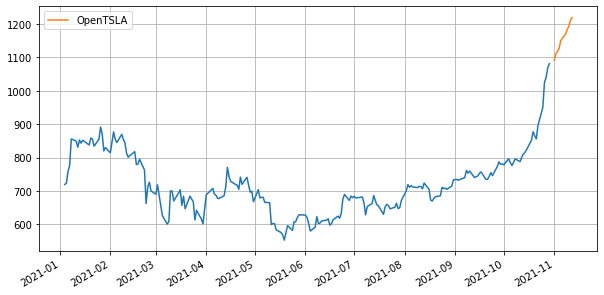

In [ ]:
plt.plot(data['Open']['TSLA'])
forecast['OpenTSLA'].plot(figsize=(10,5))
plt.legend()
plt.grid()
plt.show()

**2. Поиск правильного ответа на вопрос среди нескольких вариантов**

In [ ]:
!pip install transformers # установка библиотеки с тяжелыми нейросетевыми моделями для работы с текстом

     |████████████████████████████████| 3.1 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 57.2 MB/s 
     |████████████████████████████████| 895 kB 59.0 MB/s 
     |████████████████████████████████| 3.3 MB 46.6 MB/s 
     |████████████████████████████████| 61 kB 419 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer


model_name_or_path = "sberbank-ai/rugpt3large_based_on_gpt2"  # русскоязычная модель GPT-2 от сбера
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path)

Downloading:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

In [ ]:
def calc_likelihood(text):
    tokens_ids = tokenizer.encode(text, return_tensors="pt")
    prob = model(tokens_ids)

    tokens = tokens_ids[0].cpu().tolist()
    prob = prob[0].cpu()[0]

    likelyhood = sum([prob[i, j].item() for i, j in enumerate(tokens)])
    return likelyhood

In [ ]:
question = "Кто доказал теорию эволюции?"
answers = ["Даня Милохин", "Чарльз Дарвин", "Ленардо Да Винчи"]

In [ ]:
def predict(question, answers):
  scores = [calc_likelihood(question + " " +  answer) for answer in answers]
  print(scores)
  return np.argmax(scores)

question, answers[predict(question, answers)]

[40.67774710059166, 50.31125795841217, 50.28149914741516]


('Кто доказал теорию эволюции?', 'Чарльз Дарвин')

**3. Поиск лиц на изображении**

In [ ]:
import cv2
import imutils
import pkg_resources

In [ ]:
HAAR_XML = pkg_resources.resource_filename(
    'cv2', 'data/haarcascade_frontalface_default.xml')
FACE_CASCADE = cv2.CascadeClassifier(HAAR_XML)

In [ ]:
def get_img(file_path: str):
    image = cv2.imread(file_path)
    image = imutils.resize(image, width=512)
    return image

def get_faces_from_img(file_path : str):
    image = get_img(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = FACE_CASCADE.detectMultiScale(gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(32, 32)
    )

    return faces

In [ ]:
img_path = "uc?id=1w529iK7lFIApoedDi36_3RlOrCiZ3uFZ"
img_link = "https://drive.google.com/{}&export=download".format(img_path)

In [ ]:
!wget $img_link  # загружаем картинку

--2021-12-02 23:14:04--  https://drive.google.com/uc?id=1w529iK7lFIApoedDi36_3RlOrCiZ3uFZ
Resolving drive.google.com (drive.google.com)... 172.217.193.139, 172.217.193.113, 172.217.193.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vtjsofe5j57goqd5drsom4f5ifnfb1tp/1638486825000/07759047279068179373/*/1w529iK7lFIApoedDi36_3RlOrCiZ3uFZ [following]
--2021-12-02 23:14:04--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vtjsofe5j57goqd5drsom4f5ifnfb1tp/1638486825000/07759047279068179373/*/1w529iK7lFIApoedDi36_3RlOrCiZ3uFZ
Resolving doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)|1

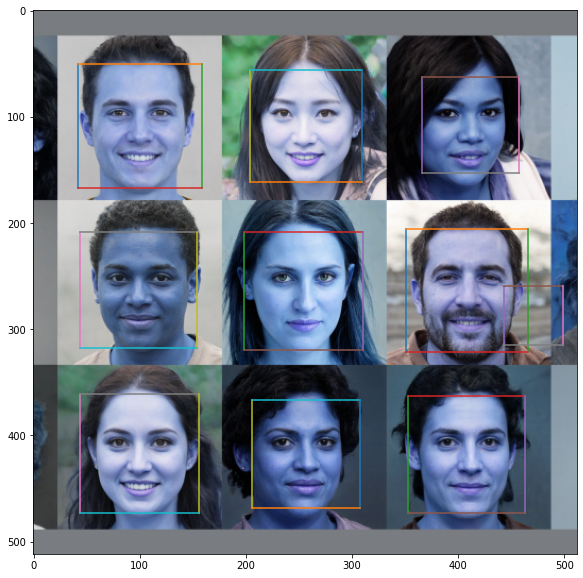

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(get_img(img_path))
for f in get_faces_from_img(img_path):
  plt.plot([f[0], f[0]], [f[1], f[1] + f[3]])
  plt.plot([f[0], f[0] + f[2]], [f[1], f[1]])
  plt.plot([f[0] + f[2], f[0] + f[2]], [f[1], f[1] + f[3]])
  plt.plot([f[0], f[0] + f[2]], [f[1] + f[3], f[1] + f[3]])
plt.show()